<a href="https://colab.research.google.com/github/Racckso/Portafolio/blob/main/1_FP_Growth_in_Market_Basket_Analysis_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1.- Introduccion**






# **2.- Objetivo del proyecto**

El objetivo del proyecto es utilizar el algortimo FP-Growth en un market basket analysis para encontrar patrones de compras, y con ello, responder las siguientes preguntas de negocio:


*   ¿Qué productos deberían promocionarse juntos?
*   ¿Existen oportunidades para desarrollar nuevos paquetes de productos o servicios?
*   ¿Qué productos son los ‘conductores’ de otras compras?

**Descripción del dataset:** El dataset es obtenido de Machine Learning Repository, y contiene las siguientes columnas:


```
Description: Descripción del producto.
Quantity: Cantidad del producto por transacción.
InvoiceDate: Fecha y hora de la factura.
Price: Precio del producto.
Customer ID: Identificación del cliente.
Country: País del cliente.
```
Nombre de dataset & link: [Online Retail II](https://archive.ics.uci.edu/dataset/502/online+retail+ii)


# 3.- Bibliotecas Usadas

In [ ]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import fpgrowth, association_rules
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# **4.- Carga y limpieza de dataset**

In [ ]:
# Cargar el archivo Excel en Google Drive

#file_path = 'ruta_del_archivo/online_retail_II.xlsx' #Por si tienen el CSV en un archivo local
#data = pd.read_excel(file_path)

from google.colab import drive
drive.mount('/content/drive')
data_path = "/content/drive/MyDrive/BD_Portafolio/online_retail_II.xlsx"
data = pd.read_excel(data_path)



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Mounted at /content/drive


In [ ]:
# Mostrar las primeras filas del dataframe para una exploración inicial
print("Primeras filas del dataset:")
display(data.head())

Primeras filas del dataset:


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [ ]:
print(data.describe())

            Quantity                    InvoiceDate          Price  \
count  370951.000000                         370951  370951.000000   
mean       11.994444  2010-07-01 00:23:08.266374400       3.145220   
min         1.000000            2009-12-01 07:45:00       0.000000   
25%         2.000000            2010-03-26 09:10:00       1.250000   
50%         4.000000            2010-07-08 19:56:00       1.950000   
75%        12.000000            2010-10-15 11:07:00       3.750000   
max     10000.000000            2010-12-09 20:01:00   10953.500000   
std        67.394793                            NaN      30.551482   

         Customer ID  
count  370951.000000  
mean    15565.407693  
min     12346.000000  
25%     14215.000000  
50%     15601.000000  
75%     16940.000000  
max     18287.000000  
std      1593.187209  


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
# Verificar y manejar valores faltantes
print("Valores faltantes antes de la limpieza:")
print(data.isnull().sum())


Valores faltantes antes de la limpieza:
Invoice             0
StockCode           0
Description      2928
Quantity            0
InvoiceDate         0
Price               0
Customer ID    107927
Country             0
dtype: int64


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Eliminar filas donde 'Description' o 'Customer ID' es nulo
data.dropna(subset=['Description', 'Customer ID'], inplace=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Filtrar transacciones que son devoluciones (cantidades negativas)
data = data[data['Quantity'] > 0]

# Filtrar para concentrarse en un solo país, por ejemplo, 'United Kingdom'
data = data[data['Country'] == 'United Kingdom']

# Verificación final de los datos
print("Valores faltantes después de la limpieza:")
print(data.isnull().sum())
print("Descripción de los datos limpios:")
print(data.describe())

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Valores faltantes después de la limpieza:
Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64
Descripción de los datos limpios:
            Quantity                    InvoiceDate          Price  \
count  370951.000000                         370951  370951.000000   
mean       11.994444  2010-07-01 00:23:08.266374400       3.145220   
min         1.000000            2009-12-01 07:45:00       0.000000   
25%         2.000000            2010-03-26 09:10:00       1.250000   
50%         4.000000            2010-07-08 19:56:00       1.950000   
75%        12.000000            2010-10-15 11:07:00       3.750000   
max     10000.000000            2010-12-09 20:01:00   10953.500000   
std        67.394793                            NaN      30.551482   

         Customer ID  
count  370951.000000  
mean    15565.407693  
min     12346.000000  
25%     14215.000000  
50%     15601.000000  
75%   

In [ ]:
# Agrupar los productos comprados en cada factura
grouped = data.groupby('Invoice')['Description'].apply(list)
display(grouped)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Invoice
489434    [15CM CHRISTMAS GLASS BALL 20 LIGHTS, PINK CHE...
489435    [CAT BOWL , DOG BOWL , CHASING BALL DESIGN, HE...
489436    [DOOR MAT BLACK FLOCK , LOVE BUILDING BLOCK WO...
489437    [CHRISTMAS CRAFT HEART DECORATIONS, CHRISTMAS ...
489438    [DINOSAURS  WRITING SET , SET OF MEADOW  FLOWE...
                                ...                        
538167    [PAPER CHAIN KIT 50'S CHRISTMAS , CHILDS GARDE...
538168    [RIBBON REEL LACE DESIGN , RIBBON REEL STRIPES...
538169    [HEART DECORATION WITH PEARLS , HEART OF WICKE...
538170    [ASSORTED COLOUR BIRD ORNAMENT, HAND WARMER BA...
538171    [3 TIER SWEETHEART GARDEN SHELF, FIRST AID TIN...
Name: Description, Length: 17614, dtype: object

# **5.-  Preparación de datos para el analisis**

In [ ]:
# Preparar los datos para el análisis
encoder = TransactionEncoder()
data_encoded = encoder.fit_transform(grouped)
df = pd.DataFrame(data_encoded, columns=encoder.columns_)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



# 5.1.- Definiendo el soporte minimo




In [ ]:
# Contar frecuencias de los productos
item_frequencies = data['Description'].value_counts().reset_index()
item_frequencies.columns = ['Description', 'Frequency']
item_frequencies['Percentage'] = (item_frequencies['Frequency'] / len(data)) * 100
print(item_frequencies.head(20))  # Mostrar los 20 productos más frecuentes

                           Description  Frequency  Percentage
0   WHITE HANGING HEART T-LIGHT HOLDER       3050    0.822211
1             REGENCY CAKESTAND 3 TIER       1533    0.413262
2       STRAWBERRY CERAMIC TRINKET BOX       1309    0.352877
3        ASSORTED COLOUR BIRD ORNAMENT       1296    0.349372
4         REX CASH+CARRY JUMBO SHOPPER       1184    0.319180
5             HOME BUILDING BLOCK WORD       1182    0.318640
6          60 TEATIME FAIRY CAKE CASES       1074    0.289526
7     PACK OF 72 RETRO SPOT CAKE CASES       1041    0.280630
8                HEART OF WICKER LARGE       1033    0.278473
9              JUMBO BAG RED RETROSPOT       1012    0.272812
10         WOODEN FRAME ANTIQUE WHITE        1000    0.269577
11    RED HANGING HEART T-LIGHT HOLDER        981    0.264455
12                LUNCH BAG RED SPOTTY        972    0.262029
13             LUNCH BAG  BLACK SKULL.        970    0.261490
14            LOVE BUILDING BLOCK WORD        969    0.261220
15      

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
# Histograma de las frecuencias de los ítems
# Crear un histograma interactivo con Plotly
fig = px.histogram(item_frequencies, x='Percentage',
                   title='Distribución de Frecuencia de Ítems',
                   labels={'Percentage': 'Porcentaje de Apariciones'},
                   nbins=30,  # Número de barras
                   opacity=0.8,  # Transparencia de las barras
                   barmode='overlay')  # Modo de barras
fig.update_layout(
    xaxis_title_text='Porcentaje de Apariciones',  # Título del eje X
    yaxis_title_text='Número de Ítems',  # Título del eje Y
    bargap=0.1,  # Espacio entre barras de histograma
    hovermode='x'  # Muestra la información del hover en el eje X
)
fig.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



# **6.- Aplicando Algoritmo FP-Growth para encontrar items frecuentes**

In [ ]:
# Aplicar el algoritmo FP-Growth para encontrar conjuntos de ítems frecuentes
frequent_itemsets = fpgrowth(df, min_support=0.02, use_colnames=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



# **6.1.-Top Items Frecuentes**

> hacemos un tratamiento a lso datos con copias de información para poder usar la libereria Plotly que utiliza strings



In [ ]:
# Crear una copia para visualización y modificar los 'itemsets' a 'strings' y utilizar plotly
frequent_itemsets_vis = frequent_itemsets.copy()
frequent_itemsets_vis['itemsets'] = frequent_itemsets_vis['itemsets'].apply(lambda x: ', '.join(x))
frequent_itemsets_vis['length'] = frequent_itemsets_vis['itemsets'].apply(lambda x: len(x.split(', ')))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
# Visualización de los conjuntos de ítems frecuentes

fig = px.bar(frequent_itemsets_vis[frequent_itemsets_vis['length'] > 1].sort_values(by='support', ascending=False).head(10),
             x='support', y='itemsets', orientation='h',
             title='Top 10 Frequent Itemsets',
             labels={'support': 'Support', 'itemsets': 'Itemsets'})
fig.update_layout(yaxis={'categoryorder':'total ascending'})
fig.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
print(frequent_itemsets.head())


    support                          itemsets
0  0.070285  (STRAWBERRY CERAMIC TRINKET BOX)
1  0.071534   (ASSORTED COLOUR BIRD ORNAMENT)
2  0.064551        (HOME BUILDING BLOCK WORD)
3  0.052856        (LOVE BUILDING BLOCK WORD)
4  0.046667    (SCOTTIE DOG HOT WATER BOTTLE)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



# **6.2.- Generando Reglas de asociación**

# **6.2.1.- Definiendo Confianza minima segun nuestros datos**


In [ ]:
# Generar reglas de asociación
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.12)
display(rules)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(WHITE HANGING HEART T-LIGHT HOLDER),(ASSORTED COLOUR BIRD ORNAMENT),0.165777,0.071534,0.021517,0.129795,1.814445,0.009658,1.066950,0.538066
1,(ASSORTED COLOUR BIRD ORNAMENT),(WHITE HANGING HEART T-LIGHT HOLDER),0.071534,0.165777,0.021517,0.300794,1.814445,0.009658,1.193100,0.483450
2,(WHITE HANGING HEART T-LIGHT HOLDER),(HOME BUILDING BLOCK WORD),0.165777,0.064551,0.021858,0.131849,2.042563,0.011157,1.077519,0.611850
3,(HOME BUILDING BLOCK WORD),(WHITE HANGING HEART T-LIGHT HOLDER),0.064551,0.165777,0.021858,0.338610,2.042563,0.011157,1.261318,0.545641
4,(LOVE BUILDING BLOCK WORD),(HOME BUILDING BLOCK WORD),0.052856,0.064551,0.029125,0.551020,8.536212,0.025713,2.083500,0.932120
5,(HOME BUILDING BLOCK WORD),(LOVE BUILDING BLOCK WORD),0.064551,0.052856,0.029125,0.451187,8.536212,0.025713,1.725806,0.943773
6,(WHITE HANGING HEART T-LIGHT HOLDER),(LOVE BUILDING BLOCK WORD),0.165777,0.052856,0.020722,0.125000,2.364930,0.011960,1.082451,0.691847
7,(LOVE BUILDING BLOCK WORD),(WHITE HANGING HEART T-LIGHT HOLDER),0.052856,0.165777,0.020722,0.392052,2.364930,0.011960,1.372193,0.609363
8,(CHOCOLATE HOT WATER BOTTLE),(HOT WATER BOTTLE TEA AND SYMPATHY),0.043715,0.044567,0.020722,0.474026,10.636297,0.018774,1.816503,0.947398
9,(HOT WATER BOTTLE TEA AND SYMPATHY),(CHOCOLATE HOT WATER BOTTLE),0.044567,0.043715,0.020722,0.464968,10.636297,0.018774,1.787342,0.948242


In [ ]:
# Visualización de las reglas de asociación por confianza y soporte

rules_vis = rules.copy()

# Convertir frozensets a strings para visualización
rules_vis['antecedents'] = rules_vis['antecedents'].apply(lambda x: ', '.join(x))
rules_vis['consequents'] = rules_vis['consequents'].apply(lambda x: ', '.join(x))

# Crear el gráfico con Plotly
fig = px.scatter(rules_vis, x='support', y='confidence', size='lift', color='lift',
                 hover_data=['antecedents', 'consequents'],
                 title='Association Rules - Support vs Confidence',
                 labels={'support': 'Support', 'confidence': 'Confidence', 'lift': 'Lift'})

# Mostrar el gráfico
fig.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



# **Respondiendo Preguntas de Negocio**

# **Identificar productos que deberían promocionarse juntos y oportunidades para paquetes**

In [ ]:
# Filtrar las reglas para responder a las preguntas específicas
# Pregunta 1 y 2: Identificar productos que deberían promocionarse juntos y oportunidades para paquetes
# Filtrar las reglas para alta confianza
promotions_and_bundles = rules[rules['confidence'] > 0.47] #Confianza de que aparezca por lo menos mas del 50% de veces juntos

# Ordenar las reglas por 'confidence' de mayor a menor
promotions_and_bundles = promotions_and_bundles.sort_values(by='confidence', ascending=False)

# Mostrar resultados
print("Productos que deberían promocionarse juntos y oportunidades para paquetes:")
display(promotions_and_bundles[['antecedents', 'consequents', 'confidence']])




Productos que deberían promocionarse juntos y oportunidades para paquetes:


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,antecedents,consequents,confidence
20,(SWEETHEART CERAMIC TRINKET BOX),(STRAWBERRY CERAMIC TRINKET BOX),0.763089
11,(RED HANGING HEART T-LIGHT HOLDER),(WHITE HANGING HEART T-LIGHT HOLDER),0.729387
27,(WOODEN PICTURE FRAME WHITE FINISH),(WOODEN FRAME ANTIQUE WHITE ),0.684741
39,(HEART OF WICKER SMALL),(HEART OF WICKER LARGE),0.567095
26,(WOODEN FRAME ANTIQUE WHITE ),(WOODEN PICTURE FRAME WHITE FINISH),0.554082
4,(LOVE BUILDING BLOCK WORD),(HOME BUILDING BLOCK WORD),0.551020
28,(LUNCH BAG PINK RETROSPOT),(LUNCH BAG RED SPOTTY),0.533432
13,(PACK OF 60 PINK PAISLEY CAKE CASES),(60 TEATIME FAIRY CAKE CASES),0.500605
32,(LUNCH BAG SPACEBOY DESIGN ),(LUNCH BAG SUKI DESIGN ),0.500605
38,(HEART OF WICKER LARGE),(HEART OF WICKER SMALL),0.493401


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



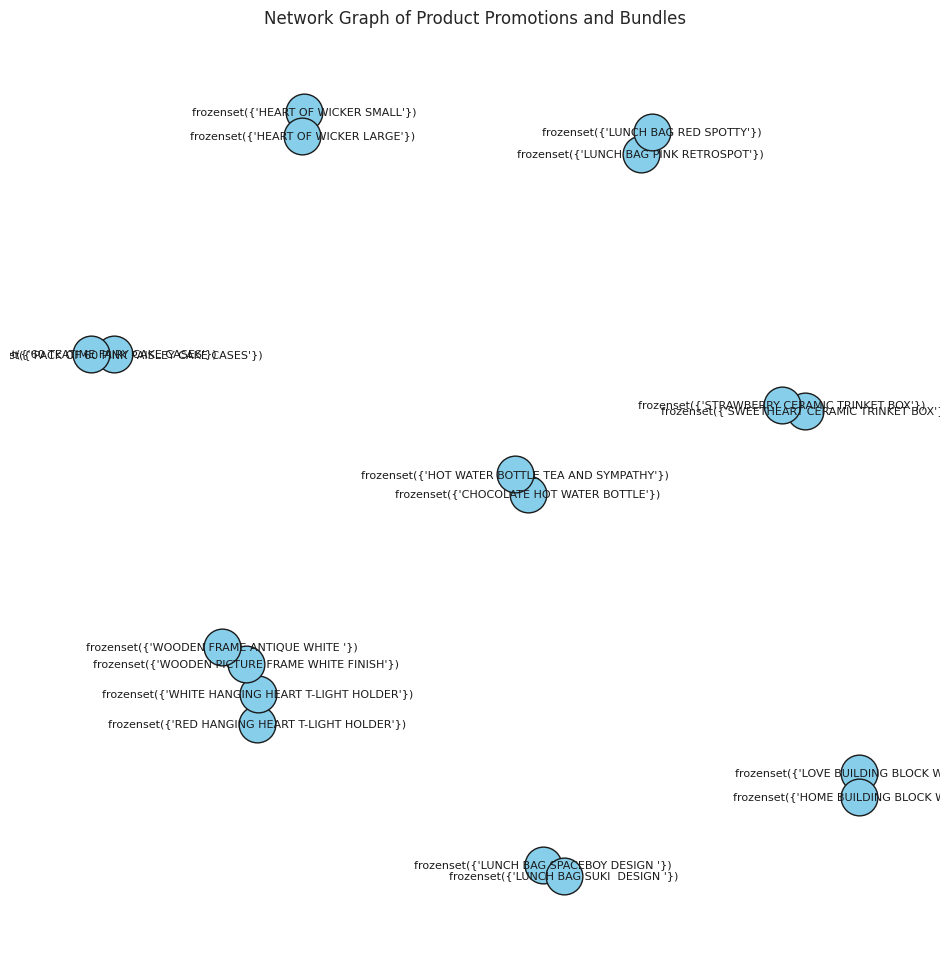

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Crear el grafo
G = nx.from_pandas_edgelist(promotions_and_bundles, source='antecedents', target='consequents', edge_attr='confidence')

# Configuración para la visualización del grafo
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G, k=0.15)  # 'k' regula la distancia entre nodos

# Asegúrate de desempaquetar correctamente u, v y attr en el bucle
edges = nx.draw_networkx_edges(G, pos, alpha=0.3, width=[float(attr['confidence'])*10 for u, v, attr in G.edges(data=True)])
nodes = nx.draw_networkx_nodes(G, pos, node_size=700, node_color='skyblue', edgecolors='k')
labels = nx.draw_networkx_labels(G, pos, font_size=8)

# Configuración adicional del gráfico
plt.axis('off')
plt.title('Network Graph of Product Promotions and Bundles')
plt.show()

In [ ]:
# Convertir frozensets a strings legibles para exportar
promotions_and_bundles['antecedents'] = promotions_and_bundles['antecedents'].apply(lambda x: ', '.join(map(str, x)))
promotions_and_bundles['consequents'] = promotions_and_bundles['consequents'].apply(lambda x: ', '.join(map(str, x)))

# Importar files de google.colab
from google.colab import files

# Guardar el DataFrame en un archivo CSV
promotions_and_bundles.to_csv('promotions_and_bundles.csv', index=False)

# Descargar el archivo CSV
files.download('promotions_and_bundles.csv')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **Identificando Productos Conductores**

seleccionando el mejor lift, segun nuestra data

In [ ]:
print(rules['lift'].describe())

count    40.000000
mean      6.924952
std       3.433765
min       1.814445
25%       2.833160
50%       7.872998
75%       9.972196
max      12.307180
Name: lift, dtype: float64


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



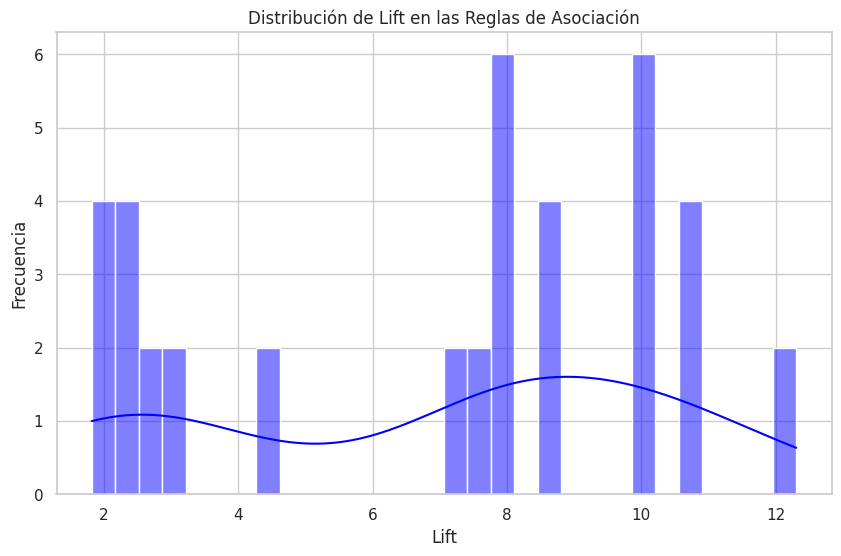

In [ ]:
# Configurar el estilo visual
sns.set(style="whitegrid")

# Histograma de la columna 'lift'
plt.figure(figsize=(10, 6))
sns.histplot(rules['lift'], bins=30, kde=True, color='blue')
plt.title('Distribución de Lift en las Reglas de Asociación')
plt.xlabel('Lift')
plt.ylabel('Frecuencia')
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



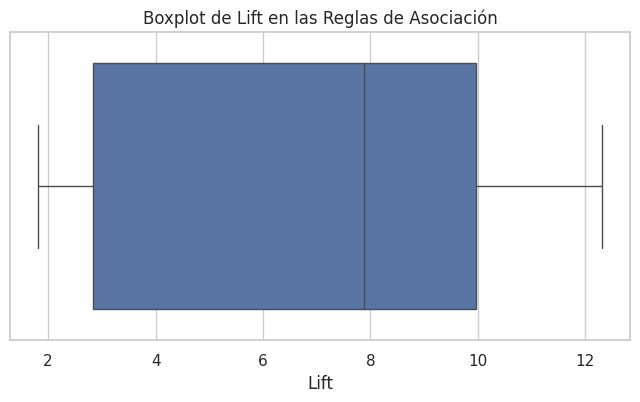

In [ ]:
# Boxplot de la columna 'lift'
plt.figure(figsize=(8, 4))
sns.boxplot(x=rules['lift'])
plt.title('Boxplot de Lift en las Reglas de Asociación')
plt.xlabel('Lift')
plt.show()

In [ ]:

# Pregunta 7: Identificar productos ‘conductores’
drivers = rules[rules['lift'] > 5].sort_values(by='lift', ascending=False)  # Ejemplo de umbral de lift

print("Productos ‘conductores’ de otras compras:")
display(drivers[['antecedents', 'consequents', 'lift']])



Productos ‘conductores’ de otras compras:


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,antecedents,consequents,lift
27,(WOODEN PICTURE FRAME WHITE FINISH),(WOODEN FRAME ANTIQUE WHITE ),12.307180
26,(WOODEN FRAME ANTIQUE WHITE ),(WOODEN PICTURE FRAME WHITE FINISH),12.307180
20,(SWEETHEART CERAMIC TRINKET BOX),(STRAWBERRY CERAMIC TRINKET BOX),10.857068
21,(STRAWBERRY CERAMIC TRINKET BOX),(SWEETHEART CERAMIC TRINKET BOX),10.857068
8,(CHOCOLATE HOT WATER BOTTLE),(HOT WATER BOTTLE TEA AND SYMPATHY),10.636297
9,(HOT WATER BOTTLE TEA AND SYMPATHY),(CHOCOLATE HOT WATER BOTTLE),10.636297
39,(HEART OF WICKER SMALL),(HEART OF WICKER LARGE),10.140917
38,(HEART OF WICKER LARGE),(HEART OF WICKER SMALL),10.140917
33,(LUNCH BAG SUKI DESIGN ),(LUNCH BAG SPACEBOY DESIGN ),10.123593
32,(LUNCH BAG SPACEBOY DESIGN ),(LUNCH BAG SUKI DESIGN ),10.123593


In [ ]:
# Crear una copia de 'drivers' para la visualización
drivers_vis = drivers.copy()

# Convertir frozensets a strings en la copia para facilitar la visualización
drivers_vis['antecedents'] = drivers_vis['antecedents'].apply(lambda x: ', '.join(x))
drivers_vis['consequents'] = drivers_vis['consequents'].apply(lambda x: ', '.join(x))

# Crear un pivote para el heatmap con la copia
pivot_table = drivers_vis.pivot(index='antecedents', columns='consequents', values='lift')

# Creando el heatmap interactivo con Plotly
fig = px.imshow(pivot_table,
                labels=dict(x="Consequents", y="Antecedents", color="Lift"),
                x=pivot_table.columns,
                y=pivot_table.index,
                aspect="auto",
                title="Heatmap of Lift Values for Products Conductors")
fig.update_xaxes(side="bottom")
fig.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
# Convertir frozensets a strings legibles para las columnas 'antecedents' y 'consequents'
if 'antecedents' in drivers.columns and 'consequents' in drivers.columns:
    drivers['antecedents'] = drivers['antecedents'].apply(lambda x: ', '.join(map(str, x)))
    drivers['consequents'] = drivers['consequents'].apply(lambda x: ', '.join(map(str, x)))


# Importar files de google.colab
from google.colab import files

# Guardar el DataFrame en un archivo CSV
drivers.to_csv('productos_detonadores.csv', index=False)

# Descargar el archivo CSV
files.download('productos_detonadores.csv')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>